# Import libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [28]:
# Replace file name with your dataset
dataset = pd.read_csv('50_Startups.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Taking care of missing data

In [ ]:
from sklearn.impute import SimpleImputer

# Replace 1:3 to columns that have missing data*
# *in the case that there is missing data
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

## Encoding categorical data

If the dataset doesn't have categorial data, skip this part

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Replace 3 with the column that needs to be encoded (0, 1, 2...)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Splitting the dataset into the Training set and Test set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
print(X_train)

[[0.0 1.0 0.0 55493.95 103057.49 214634.81]
 [0.0 0.0 1.0 46014.02 85047.44 205517.64]
 [0.0 1.0 0.0 75328.87 144135.98 134050.07]
 [1.0 0.0 0.0 46426.07 157693.92 210797.67]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 1000.23 124153.04 1903.93]
 [0.0 0.0 1.0 542.05 51743.15 0.0]
 [0.0 0.0 1.0 65605.48 153032.06 107138.38]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 1.0 0.0 61994.48 115641.28 91131.24]
 [1.0 0.0 0.0 63408.86 129219.61 46085.25]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [1.0 0.0 0.0 23640.93 96189.63 148001.11]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 15505.73 127382.3 35534.17]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 0.0 64664.71 139553.16 137962.62]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 0.0 28754.33 118546.05 172795.67]
 [1.

# Feature scaling

SVR method requires Feature scaling.
Configure feature scaling according to your data!!

In [32]:
y_train_svr = y_train.reshape(len(y_train),1)

In [33]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_svr = sc_X.fit_transform(X_train)
y_train_svr = sc_y.fit_transform(y_train_svr)

# Training different models on the dataset

**(Multiple) Linear regression**

In [34]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

**Polynomial Regression**

In [35]:
from sklearn.preprocessing import PolynomialFeatures

# Replace 3 with number of degrees you want (3 -> x^1 + x^2 + x^3)
poly_feat = PolynomialFeatures(degree = 3)
X_poly = poly_feat.fit_transform(X_train)

poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y_train)

LinearRegression()

**Support Vector Regression (SVR)**

In [36]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(X_train_svr, y_train_svr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

**Decision Tree**

In [37]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state = 0)
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

**Random Forest**

In [38]:
from sklearn.ensemble import RandomForestRegressor
# Change 10 to number of trees you want
random_forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

# Visualizing predictions

Replace the x_label and y_label text according to your dataset.

**Beware that only datasets with 1 X column can be visualized!
If your dataset has more than 1 dependant variable, skip this block!**

In [24]:
x_label = "Type here what the X coordinate shows"
y_label = "Type here what the Y coordinate shows"

ValueError: ignored

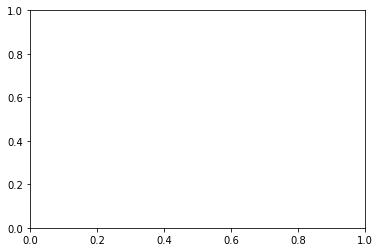

In [25]:
plt.scatter(X,y, color = 'red')
plt.plot(X, linear_regressor.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X,y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_regressor.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial regression')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

In [ ]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(svr_regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('SVR')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, decision_tree_regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, random_forest_regressor.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

# Evaluating the models' performance

**Linear Regression**

In [39]:
from sklearn.metrics import r2_score

y_pred = linear_regressor.predict(X_test)

r2_score(y_test, y_pred)

0.9347068473282515

**Polynomial Regression**

In [40]:
from sklearn.metrics import r2_score

y_pred = poly_regressor.predict(poly_feat.transform(X_test))

r2_score(y_test, y_pred)

-26.996136413771644

**Support Vector Regression (SVR)**

In [42]:
from sklearn.metrics import r2_score

y_pred = sc_y.inverse_transform(svr_regressor.predict(sc_X.transform(X_test)))

y_test_svr = y_test.reshape(len(y_test), 1)

r2_score(y_test_svr, y_pred)

ValueError: ignored

**Decision Tree**

In [15]:
from sklearn.metrics import r2_score

y_pred = decision_tree_regressor.predict(X_test)

r2_score(y_test, y_pred)

0.9594341740623319

**Random Forest**

In [17]:
from sklearn.metrics import r2_score

y_pred = random_forest_regressor.predict(X_test)

r2_score(y_test, y_pred)

0.9658739721928109